In [32]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

# Problem 1 & 2

In [34]:
def Jacobi(A, b, tol, maxiters, plot = False):
    m, n = A.shape
    currentItr = 1
    difference = tol + 1
    L = np.tril(A)
    U = np.triu(A)
    D = np.diag(A)
    x0 = b/D
    plot_error = []
    while (currentItr < maxiters) and (difference > tol):
        x1 = x0 + (b - A@x0)/D
        #print(x1)
        difference = la.norm(x1-x0, ord = np.inf)
        plot_error.append(difference)
        #print(difference)
        x0 = x1
        currentItr += 1
        
    if plot:
        plt.plot(np.array(plot_error))
        plt.xlabel("# of iterations")
        plt.ylabel("Absolute error of approximation")
        plt.title("Convergence of Jacobi method")
    return x0

def diag_dom(n, num_entries=None):
    """Generate a strictly diagonally dominant (n, n) matrix.
    Parameters:
        n (int): The dimension of the system.
        num_entries (int): The number of nonzero values.
            Defaults to n^(3/2)-n.
    Returns:
        A ((n,n) ndarray): A (n, n) strictly diagonally dominant matrix.
    """
    if num_entries is None:
        num_entries = int(n**1.5) - n
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n), size=num_entries)
    cols = np.random.choice(np.arange(0,n), size=num_entries)
    data = np.random.randint(-4, 4, size=num_entries)
    for i in range(num_entries):
        A[rows[i], cols[i]] = data[i]
    for i in range(n):
        A[i,i] = np.sum(np.abs(A[i])) + 1
    return A

A = diag_dom(5)

b = np.ones(5)
ans = Jacobi(A, b, 1e-8, 1000)
np.allclose(A@ans, b)

True

array([ 0.99999999, -0.5       ,  0.99999999, -0.49999999,  1.        ])

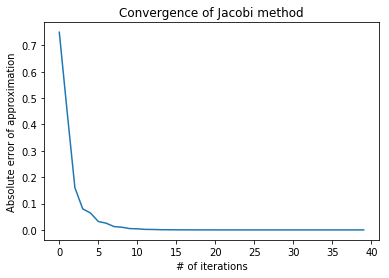

In [35]:
Jacobi(A, b, 1e-8, 1000, True)

# Exercise 3

True

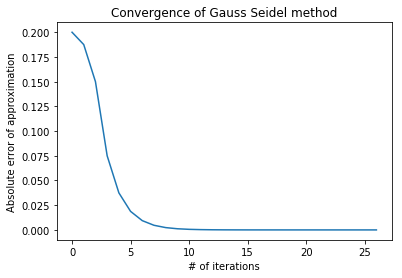

In [51]:
def Gauss_seidel(A, b, tol, maxiter, plot = False):
    m, n = A.shape
    D = np.diag(A)
    x0 = b/D
    error_vec = []
    difference = tol + 1
    currentItr = 1
    x1 = np.zeros_like(x0)
    while (difference > tol) and (currentItr<maxiter):
        #need to make a copy because change is in place, otherwise cannot measure error
        temp = np.copy(x0)
        for i in range(n):
            x1[i] = x0[i] + (b[i] - np.dot(A[i,:],x0))/A[i,i]
        difference = la.norm(x1 - temp, np.inf)
        error_vec.append(difference)
        x0 = x1
    if plot:
        plt.plot(error_vec)
        plt.title("Convergence of Gauss Seidel method")
        plt.xlabel("# of iterations")
        plt.ylabel("Absolute error of approximation")
    return x0


res = Gauss_seidel(A, b, 1e-8, 1000, True)        
np.allclose(A@res, b)
    
        

# Exercise 4

In [ ]:
from scipy import sparse
def sparce_gauss(A, b, tol, maxiter):
    m, n = A.shape
    D = np.diag(A)
    x0 = b/D
    error_vec = []
    difference = tol + 1
    currentItr = 1
    x1 = np.zeros_like(x0)
    while (difference > tol) and (currentItr<maxiter):
        #need to make a copy because change is in place, otherwise cannot measure error
        temp = np.copy(x0)
        for i in range(n):
            x1[i] = x0[i] + (b[i] - np.dot(A[i,:],x0))/A[i,i]
        difference = la.norm(x1 - temp, np.inf)
        x0 = x1             
    return x0                       
                             
A = diag_dom(5)
b = np.ones(5)

np.allclose(A@sparce_gauss(A, b, 1e-6, 1000), b)
                             
                
                             
                             
                
                    

# Exercise 5

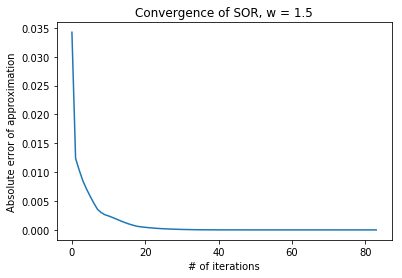

True

In [61]:
def SOR(A, b, tol, maxiter, omega, plot = False):
    m, n = A.shape
    D = np.diag(A)
    x0 = b/D
    error_vec = []
    difference = tol + 1
    currentItr = 1
    x1 = np.zeros_like(x0)
    while (difference > tol) and (currentItr<maxiter):
        #need to make a copy because change is in place, otherwise cannot measure error
        temp = np.copy(x0)
        for i in range(n):
            x1[i] = x0[i] + (b[i] - np.dot(A[i,:],x0))/A[i,i]*omega
        difference = la.norm(x1 - temp, np.inf)
        error_vec.append(difference)
        x0 = x1
    if plot:
        plt.plot(error_vec)
        title = "Convergence of SOR, w = " + str(omega)
        plt.title(title)
        plt.xlabel("# of iterations")
        plt.ylabel("Absolute error of approximation")
        plt.show()
    return x0, currentItr

A = diag_dom(500)
b = np.ones(500)
res = SOR(A, b, 1e-8, 1000, 1.5, True)        
np.allclose(A@res[0], b)

# Exercise 7

In [64]:
# change the value of omega
omega = np.linspace(1, 1.95, 20)

In [65]:
omega

array([1.  , 1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ,
       1.55, 1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])

0
1
2
3
4
5
6
7
8


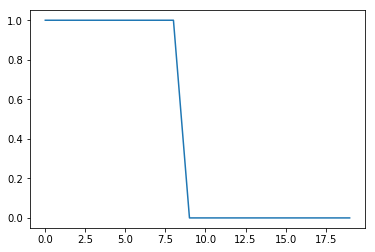

In [72]:
A = diag_dom(100)
b = np.ones(100)
iters = np.zeros(20)
for i in range(9):
    print(i)
    iters[i] = SOR(A, b, 1e-8, 1000, omega[i], False)[1]
plt.plot(iters)